Chapter05 완전 연결 신경망 분류(Classification)

15 원-핫 인코딩과 교차 엔트로피 오차

16 활성화 함수

17 분류 성능평가

18 1-Dense 층(1뉴런) AND?OR 분류

19 1-Dense 층(2뉴런) AND?OR 분류

20 2층 신경망: XOR 이진 분류

21 2D 정규분포 데이터 생성 및 분류

22 IRIS 데이터 분류

# 0. Prerequisite

In [ ]:
# https://research.google.com/colaboratory/local-runtimes.html

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 16. Activation Function


* 우리 뇌의 뉴런은 임계치를 넘는 신호가 들어오면 출력함
* <a href="https://uploads-ssl.webflow.com/614c82ed388d53640613982e/64a6b855e23a0a3dff98bfa0_linear%20and%20non%20linear%20functions.webp">nonlinear</a>: 복잡한 표현을 학습하기 위해 필요
* 그렇지 않으면, 결국 레이어 하나로 표현 가능해짐
* weighted sum -> activation 함수의 입력 값

$$ Weighted\ Sum = \sum_{i=1}^nx_iW_i + b$$

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*Uzraphxv6aozpVYbqYYAVw.jpeg" width=800 />


In [ ]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)
y_true = np.array([[0],[0],[0],[1]], dtype = np.float32)   # AND
X, y_true

(array([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [1.]], dtype=float32))

In [ ]:
model = tf.keras.Sequential()
# activation=tf.keras.activations.sigmoid

# sigmoid, tanh, relu, softmax
model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*a04iKNbchayCAJ7-0QlesA.png" width=400/>


### sigmoid

* 미분 가능함
* <a href="https://upload.wikimedia.org/wikipedia/commons/d/dc/Exponenciala_priklad.png">지수함수</a>로 (0, 1) 사이의 값 (마치 확률처럼)
* 함수값이 (0, 1) 값이므로 <a href="https://uploads-ssl.webflow.com/614c82ed388d53640613982e/64a7fb7b268ea3f26d08b456_vanishing-and-exploding-gradients.webp">exploding</a> 안됨
* but, <a href="https://uploads-ssl.webflow.com/614c82ed388d53640613982e/64a7fb7b268ea3f26d08b456_vanishing-and-exploding-gradients.webp">vanishing gradient</a> 문제가 있음
* weights sum 값이 -100이나 100인 경우 gradient가 거의 0에 가까워서 saturated neurons 은 거의 변경되지 않음




## Gradient vanishing, exploding, saturation problem

<img src="https://global-uploads.webflow.com/5ef788f07804fb7d78a4127a/6245a9aca7defe61cea5ea7d_Engati-vanishing-point-problem.jpg" width=400><img src="https://miro.medium.com/max/1178/1*54WxyNRIoO6OX8Jwa-caeQ.webp" width=400>



* gradient vanishing problem, 미분값 최대 0.25,
* layer가 7층인 경우, $0.25^7 = 0.000061035 $


<img src="https://miro.medium.com/max/1400/1*ZafDv3VUm60Eh10OeJu1vw.webp" width=800 />

### tanh

* scaled sigmoid function
* 함수값이 (-1,1) 사이고, (0,0) 에서 대칭
* RNN, LSTM

### relu (hinton, 2010)

* vanishing gradient 문제를 해결하고자 고안 (z 값이 0 보다 크면 미분값이 1임)
* 함수값은 max(0, z)
* 가장 널리 사용됨 (특히 큰 규모의 모델에서)
* 계산이 빠름
* but, [0, 무한대) 범위, 양수값이 너무 커서 exploding 될 수 있음
* relu 는 마이너스에서 미분 불가
* weight sum 값이 마이너스이면 0 이 됨 => dying ReLU 문제 (미분값이 없으므로, weight 초기값에 변화가 없음)


### leaky relu(2013)

* relu 가 마이너스에서 미분되지 않는 단점을 보완
* max(0.1z, z)

### softmax

* 주로 분류(classification) 모델의 마지막 계층의 활성화 함수로 사용됨




<img src="https://www.researchgate.net/profile/Nabi-Nabiyev-2/publication/349662206/figure/fig3/AS:995882686246913@1614448343589/Working-principles-of-softmax-function.jpg" width=400/>

$$ softmax(z) = \frac{{e^{z_{j}}}}{\Sigma_{n=1}^{n}{e^{z_{n}}}}, (for \ j=1, 2, ...n)$$

* 큰 값을 강조하고 작은 값을 약화시키는 효과
* 0 이나 음수에도 적용 가능
* 결과값으로 확률이 필요한 경우 사용 (classification 등)

In [ ]:
#z=tf.random.normal(shape=(1,3))
z=[2.,1,0]
z=tf.reshape(z, shape=(1,3))
print('z', z)

softmax_output=tf.keras.activations.softmax(z)
print('softmax_output', softmax_output)

# sigmoid_output=tf.keras.activations.sigmoid(z)
# print('sigmoid_output', sigmoid_output)

z tf.Tensor([[2. 1. 0.]], shape=(1, 3), dtype=float32)
softmax_output tf.Tensor([[0.66524094 0.24472848 0.09003057]], shape=(1, 3), dtype=float32)


In [ ]:
import tensorflow as tf
import numpy as np

x = tf.constant([-10, -1.0, 0.0, 1.0, 10], dtype = tf.float32)

y1 = tf.keras.activations.linear(x)
y2 = tf.keras.activations.sigmoid(x)
y3 = tf.keras.activations.tanh(x)
y4 = tf.keras.activations.relu(x)
y5 = tf.keras.layers.LeakyReLU(alpha=0.1)(x)
y6 = tf.keras.activations.softmax(tf.reshape(x, shape=(1, -1)))

print("y1=", y1.numpy())
print("y2=", y2.numpy())
print("y3=", y3.numpy())
print("y4=", y4.numpy())
print("y5=", y5.numpy())
print("y6=", y6.numpy())
print("sum(y6)=", np.sum(y6.numpy())) # 1.0

y1= [-10.  -1.   0.   1.  10.]
y2= [4.5397868e-05 2.6894143e-01 5.0000000e-01 7.3105860e-01 9.9995458e-01]
y3= [-1.        -0.7615942  0.         0.7615942  1.       ]
y4= [ 0.  0.  0.  1. 10.]
y5= [-1.  -0.1  0.   1.  10. ]
y6= [[2.0607716e-09 1.6698603e-05 4.5391513e-05 1.2338691e-04 9.9981457e-01]]
sum(y6)= 1.0


# Step 15. One-hot encoding

숫자가 아닌 데이터([개, 고양이], 문자열 - "이것을 강력 추천합니다" 등) 를 모델의 입력으로 사용하려면 숫자로 변경해야 함

### why one-hot encoding?

개, 고양이, 토끼를 각각 1,2,3 으로 인코딩 하면,

* 토끼가 가장 중요한 값인가?

* 개와 토끼의 평균은 고양이인가?




### when should not use?

* 카테고리 값이 50개이면, 새로운 컬럼 50개가 추가됨

* 남 10, 여 01 로 one-hot 인코딩하면, 두 컬럼 사이에 강한 상관 관계가 발생함 (남 컬럼이 1이면, 무조건 여 컬럼은 0임)

| 원래 컬럼   |   남 컬럼      |  여 컬럼 |
|----------|:-------------:|------:|
| 남자 |  1 | 0 |
| 여자 |  0 | 1 |
| 남자 |  1 | 0 |


## p.113

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

import tensorflow as tf
import numpy as np

y = range(2) # integer label
print("y=", list(y))

y = np.arange(2)
y1 = tf.keras.utils.to_categorical(y) # keras one-hot label
print("y1=", y1)

y2 = tf.keras.utils.to_categorical([1, 2, 3, 0, 2], num_classes=4)
print("y2=", y2)

y= [0, 1]
y1= [[1. 0.]
 [0. 1.]]
y2= [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]



## Categorical Cross-Entropy Loss

https://en.wikipedia.org/wiki/Entropy_%28information_theory%29

> In information theory, the entropy of a random variable is the average level of "information", "surprise", or "uncertainty" inherent to the variable's possible outcomes.


$$ Entropy(x) = log \frac{1}{softmax(x)} = -log(softmax(x)) $$

<br>

$$ Entropy의\ 기대값 (x) = 확률(Y\_label)에\ 엔트로피를\ 곱한\ 값 \\
즉,\ E(엔트로피)\ =\ -확률(Y\_label)\ log(softmax(x)) $$

* 엔트로피는 불확실성이 높으면 값이 높음
* 엔트로피는 확률의 역수에 로그를 취한 값
* 확률의 역수를 취하는 이유는 확률이 높은 사건일수록 정보량(놀라움, 불확실성)이 낮다고 판단
* loss 로 사용 시 엔트로피 값 (불확실성) 을 낮추는 방향으로 학습


$$ CCE = -\frac{1}{n}\Sigma_{i=1}^nE(x)$$



In [ ]:
softmax_output=[[0.87, 0.13], [0.6, 0.4]]
entropy=tf.math.log(softmax_output)
print('entropy', entropy)

y_label=tf.keras.utils.to_categorical([0,1], num_classes=2)
print('y_label', y_label)

E_entropy = -1/2*(y_label * entropy)
print('E_entropy', E_entropy)

CCE = tf.reduce_sum(E_entropy)
print('CCE', CCE)

tf.keras.losses.CategoricalCrossentropy()(y_label, softmax_output)

entropy tf.Tensor(
[[-0.13926207 -2.040221  ]
 [-0.5108256  -0.9162907 ]], shape=(2, 2), dtype=float32)
y_label [[1. 0.]
 [0. 1.]]
E_entropy tf.Tensor(
[[0.06963103 0.        ]
 [0.         0.45814535]], shape=(2, 2), dtype=float32)
CCE tf.Tensor(0.52777636, shape=(), dtype=float32)


<tf.Tensor: shape=(), dtype=float32, numpy=0.52777636>

### CategoricalCrossentropy

In [ ]:
import tensorflow as tf
import numpy as np

CCE = tf.keras.losses.CategoricalCrossentropy()

# one-hot encoding
y_label= np.array([[1,   0,   0,   0],   #t[0]
             [0,   1,   0,   0],   #t[1]
             [0,   0,   1,   0],   #t[2]
             [0,   0,   0,   1]])  #t[3]

# softmax output
z =np.array([[0.4, 0.3, 0.2, 0.1], #y[0]
             [0.1, 0.3, 0.2, 0.4]])#y[1]

#1
print("CCE(t[i], y[0])")
print("CCE(t[0], y[0])=", CCE(y_label[0], z[0]).numpy() )
print("CCE(t[1], y[0])=", CCE(y_label[1], z[0]).numpy() )
print("CCE(t[2], y[0])=", CCE(y_label[2], z[0]).numpy() )
print("CCE(t[3], y[0])=", CCE(y_label[3], z[0]).numpy() )

#2
print("CCE(t[i], y[1])")
print("CCE(t[0], y[1])=", CCE(y_label[0], z[1]).numpy() )
print("CCE(t[1], y[1])=", CCE(y_label[1], z[1]).numpy() )
print("CCE(t[2], y[1])=", CCE(y_label[2], z[1]).numpy() )
print("CCE(t[3], y[1])=", CCE(y_label[3], z[1]).numpy() )

#3
print("CCE(np.vstack((t[1], t[1])), y)=",
       CCE(np.vstack((y_label[0], y_label[1])), z).numpy() )

(0.916290731874155 + 1.203972804325936) / 2

CCE(t[i], y[0])
CCE(t[0], y[0])= 0.916290731874155
CCE(t[1], y[0])= 1.203972804325936
CCE(t[2], y[0])= 1.6094379124341003
CCE(t[3], y[0])= 2.3025850929940455
CCE(t[i], y[1])
CCE(t[0], y[1])= 2.3025850929940455
CCE(t[1], y[1])= 1.203972804325936
CCE(t[2], y[1])= 1.6094379124341003
CCE(t[3], y[1])= 0.916290731874155
CCE(np.vstack((t[1], t[1])), y)= 1.0601317681000455


1.0601317681000455

### SparseCategoricalCrossentropy

In [ ]:
import tensorflow as tf
import numpy as np

SCE = tf.keras.losses.SparseCategoricalCrossentropy()

# label encoding
t = tf.convert_to_tensor([0, 1, 2, 3])

# softmax output
y =tf.convert_to_tensor([[0.4, 0.3, 0.2, 0.1], #y[0]
                         [0.1, 0.3, 0.2, 0.4]])#y[1]

#1
print("SCE(t[i], y[0])")
print("SCE(t[0], y[0])=", SCE(t[0], y[0]).numpy() )
print("SCE(t[1], y[0])=", SCE(t[1], y[0]).numpy() )
print("SCE(t[2], y[0])=", SCE(t[2], y[0]).numpy() )
print("SCE(t[3], y[0])=", SCE(t[3], y[0]).numpy() )

#2
print("SCE(t[i], y[1])")
print("SCE(t[0], y[1])=", SCE(t[0], y[1]).numpy() )
print("SCE(t[1], y[1])=", SCE(t[1], y[1]).numpy() )
print("SCE(t[2], y[1])=", SCE(t[2], y[1]).numpy() )
print("SCE(t[3], y[1])=", SCE(t[3], y[1]).numpy() )

#3
print("SCE(tf.stack((t[1], t[1])), y)=",
       SCE(tf.stack((t[0], t[1])), y).numpy() )

SCE(t[i], y[0])
SCE(t[0], y[0])= 0.91629076
SCE(t[1], y[0])= 1.2039728
SCE(t[2], y[0])= 1.609438
SCE(t[3], y[0])= 2.3025851
SCE(t[i], y[1])
SCE(t[0], y[1])= 2.3025851
SCE(t[1], y[1])= 1.2039728
SCE(t[2], y[1])= 1.609438
SCE(t[3], y[1])= 0.91629076
SCE(tf.stack((t[1], t[1])), y)= 1.0601318


### BinaryCrossentropy

In [ ]:
import tensorflow as tf
import numpy as np

BCE = tf.keras.losses.BinaryCrossentropy()

# one-hot encoding
t= np.array([[1,   0,   0,   0],   #t[0]
             [0,   1,   0,   0],   #t[1]
             [0,   0,   1,   0],   #t[2]
             [0,   0,   0,   1]])  #t[3]

# softmax output
y =np.array([[0.4, 0.3, 0.2, 0.1], #y[0]
             [0.1, 0.3, 0.2, 0.4]])#y[1]

#1
print("BCE(t[i], y[0])")
print("BCE(t[0], y[0])=", BCE(t[0], y[0]).numpy() )
print("BCE(t[1], y[0])=", BCE(t[1], y[0]).numpy() )
print("BCE(t[2], y[0])=", BCE(t[2], y[0]).numpy() )
print("BCE(t[3], y[0])=", BCE(t[3], y[0]).numpy() )

#2
print("BCE(t[i], y[1])")
print("BCE(t[0], y[1])=", BCE(t[0], y[1]).numpy() )
print("BCE(t[1], y[1])=", BCE(t[1], y[1]).numpy() )
print("BCE(t[2], y[1])=", BCE(t[2], y[1]).numpy() )
print("BCE(t[3], y[1])=", BCE(t[3], y[1]).numpy() )

#3
print("BCE(np.vstack((t[0], t[0])), y)=",
       BCE(np.vstack((t[0], t[0])), y).numpy() )

BCE(t[i], y[0])
BCE(t[0], y[0])= 0.4003672784541813
BCE(t[1], y[0])= 0.5108254397382338
BCE(t[2], y[0])= 0.6455745187904711
BCE(t[3], y[0])= 0.8483069443724252
BCE(t[i], y[1])
BCE(t[0], y[1])= 0.8483069443724252
BCE(t[1], y[1])= 0.5108254397382338
BCE(t[2], y[1])= 0.6455745187904711
BCE(t[3], y[1])= 0.40036727845418124
BCE(np.vstack((t[0], t[0])), y)= 0.6243371114133032


### 결론적으로 ...

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='softmax'))
model.summary()
# cross-entropy loss for binary (0 or 1) classification
model.compile(optimizer='adam', loss='binary_crossentropy')

# labels to be provided in a one_hot representation
# y_label = [[0, 1, 0], [1, 0, 0]]
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=3, input_dim=2, activation='softmax'))
model.summary()
# two or more label classes, one_hot representation
model.compile(optimizer='adam', loss='categorical_crossentropy')

# labels as integers
# y_label = [1, 2]
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=3, input_dim=2, activation='softmax'))
model.summary()
# two or more label classes, labels as integers
model.compile(optimizer='adam', loss='binary_crossentropy')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)   

# Step 17. tf.keras.metrics for classification

<img src="https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg" width=400/><img src="https://1.bp.blogspot.com/-b_lbkGbwKCo/W-lK6MZ3-xI/AAAAAAAAAYA/uuAkY-KkyEAdSJPxJKRaam0qQoMo9wZ4ACLcBGAs/s1600/2.PNG" width=400/>



### 결론적으로 ...

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='softmax'))
model.summary()

### metrics=['accuracy']

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'f1_score'])

In [ ]:
print("y_true=",y_true)
print("y_pred=",y_pred)
C = tf.math.confusion_matrix(y_true, y_pred)
print("confusion_matrix(C)=", C)

y_true= [1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1]
y_pred= [0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1]
confusion_matrix(C)= tf.Tensor(
[[9 3]
 [3 3]], shape=(2, 2), dtype=int32)


In [ ]:
#5
#5-1
m = tf.keras.metrics.TruePositives()
m.update_state(y_true, y_pred)
tp = m.result()  # m.true_positives
print("tp =", tp.numpy())

#5-2
m = tf.keras.metrics.TrueNegatives()
m.update_state(y_true, y_pred)
tn = m.result() # m.accumulator[0]
print("tn=", tn.numpy())

#5-3
m = tf.keras.metrics.FalsePositives()
m.update_state(y_true, y_pred)
fp = m.result() # m.accumulator[0] sms
print("fp=", fp.numpy())

#5-4
m = tf.keras.metrics.FalseNegatives()
m.update_state(y_true, y_pred)
fn = m.result()# m.accumulator[0]
print("fn=", fn.numpy())

tp = 3.0
tn= 9.0
fp= 3.0
fn= 3.0


In [ ]:
accuracy4  = (tp + tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall    = tp/(tp+fn)
f1 = 2*tp/(2*tp + fp + fn) # harmonic mean of precision and recall
print("accuracy4 =", accuracy4.numpy())
print("precision =",precision.numpy())
print("recall =",   recall.numpy())
print("f1 score =", f1.numpy())

accuracy4 = 0.6666667
precision = 0.5
recall = 0.5
f1 score = 0.5


In [ ]:
#4:
m = tf.keras.metrics.Accuracy()
m.update_state(y_true, y_pred)
print("m.total={}, m.count={}".format(m.total.numpy(), m.count.numpy()))
accuracy3 = m.result()  # m.total/m.count
print("accuracy3=", accuracy3.numpy())

#6
#6-1
m = tf.keras.metrics.Precision()
m.update_state(y_true, y_pred)
print("m.true_positives=", m.true_positives.numpy())
print("m.false_positives", m.false_positives.numpy())
print("precision=", m.result().numpy())

#6-2
m = tf.keras.metrics.Recall()
m.update_state(y_true, y_pred)
print("m.true_positives=", m.true_positives.numpy())
print("m.false_negatives", m.false_negatives.numpy())
print("recall=", m.result().numpy())

m.total=12.0, m.count=18.0
accuracy3= 0.6666667
m.true_positives= [3.]
m.false_positives [3.]
precision= 0.5
m.true_positives= [3.]
m.false_negatives [3.]
recall= 0.5


### p.129

In [ ]:
import tensorflow as tf
import numpy as np
#1
##y_true = np.array([0, 1, 2, 0, 1, 2])
##y_true = tf.keras.utils.to_categorical(y_true) # one-hot
y_true = np.array([[1, 0, 0], #0
                   [0, 1, 0], #1
                   [0, 0, 1], #2
                   [1, 0, 0], #0
                   [0, 1, 0], #1
                   [0, 0, 1]]);#2

y_pred = np.array([[0.3, 0.6, 0.1],  #1,
                   [0.6, 0.3, 0.1],  #0
                   [0.1, 0.3, 0.6],  #2
                   [0.3, 0.6, 0.1],  #1
                   [0.1, 0.6, 0.3],  #1
                   [0.3, 0.1, 0.6]]);#2
num_class = y_true.shape[1] # 3

#2: C and TOP_k
#2-1: threshold, and C in # 3-1, #4-1, and #6 in [step1701]
y_true1 = np.argmax(y_true, axis=1).flatten()
y_pred1 = np.argmax(np.cast['int'](y_pred>0.5), axis=1).flatten()
C = tf.math.confusion_matrix(y_true1, y_pred1)
print("y_true1=",y_true1) # y_true1= [0 1 2 0 1 2]
print("y_pred1=",y_pred1) # y_pred1= [1 0 2 1 1 2]
print("confusion_matrix(C)=", C)

#2-2: to find top-k index, in #3-2, #4-2
k=2
indx = tf.argsort(y_pred, axis=1, direction='DESCENDING')
TOP_k = indx[:,:k]
print("TOP_k = ", TOP_k)

#3
print("In each class, precision!")
#3-1: binary(1 above threshold=0.5, 0 below threshold= 0.5)
for i in range(num_class):
    m = tf.keras.metrics.Precision(class_id = i)
    m.update_state(y_true, y_pred)
    tp = m.true_positives.numpy()
    fp = m.false_positives.numpy()
    p = m.result().numpy()
    print(" p_{} ={}, tp={}, fp= {}".format(i,p, tp, fp))

#3-2: the top-k classes with the highest predicted values
print("In each class, precision with top_k=", k)
for i in range(num_class):
    m = tf.keras.metrics.Precision(top_k=k, class_id = i)
    m.update_state(y_true, y_pred)
    tp = m.true_positives.numpy()
    fp = m.false_positives.numpy()
    p = m.result().numpy()
    print(" p_{} ={}, tp={}, fp= {}".format(i,p, tp, fp))
#4
print("In each class, recall!")
#4-1: binary(1 above threshold=0.5, 0 below threshold= 0.5)
for i in range(num_class):
    m = tf.keras.metrics.Recall(class_id = i)
    m.update_state(y_true, y_pred)
    tp = m.true_positives.numpy()
    fn = m.false_negatives.numpy()
    r = m.result().numpy()
    print(" recall_{} ={}, tp={}, fn= {}".format(i,r, tp, fn))

#4-2: the top-k classes with the highest predicted values
print("In each class, recall with top_k=", k)
for i in range(num_class):
    m = tf.keras.metrics.Recall(top_k=k, class_id = i)
    m.update_state(y_true, y_pred)
    r = m.result().numpy()
    print(" recall_{} ={}, tp={}, fn= {}".format(i,r, tp, fn))

y_true1= [0 1 2 0 1 2]
y_pred1= [1 0 2 1 1 2]
confusion_matrix(C)= tf.Tensor(
[[0 2 0]
 [1 1 0]
 [0 0 2]], shape=(3, 3), dtype=int32)
TOP_k =  tf.Tensor(
[[1 0]
 [0 1]
 [2 1]
 [1 0]
 [1 2]
 [2 0]], shape=(6, 2), dtype=int32)
In each class, precision!
 p_0 =0.0, tp=[0.], fp= [1.]
 p_1 =0.3333333432674408, tp=[1.], fp= [2.]
 p_2 =1.0, tp=[2.], fp= [0.]
In each class, precision with top_k= 2
 p_0 =0.5, tp=[2.], fp= [2.]
 p_1 =0.4000000059604645, tp=[2.], fp= [3.]
 p_2 =0.6666666865348816, tp=[2.], fp= [1.]
In each class, recall!
 recall_0 =0.0, tp=[0.], fn= [2.]
 recall_1 =0.5, tp=[1.], fn= [1.]
 recall_2 =1.0, tp=[2.], fn= [0.]
In each class, recall with top_k= 2
 recall_0 =1.0, tp=[2.], fn= [0.]
 recall_1 =1.0, tp=[2.], fn= [0.]
 recall_2 =1.0, tp=[2.], fn= [0.]


### p.132

In [ ]:
import tensorflow as tf
import numpy as np

#1
y_true = np.array([0, 1, 2, 0, 1, 2])
y_pred = np.array([1, 0, 2, 1, 1, 2])

#2
m = tf.keras.metrics.Accuracy()
m.update_state(y_true, y_pred)  #m.count = 3, m.total=6
print("accuracy from f.keras.metrics.Accuracy()=", m.result().numpy() )

#3
C = tf.math.confusion_matrix(y_true, y_pred)
print("confusion_matrix=", C)

correct = tf.linalg.diag_part(C)
col_sum = tf.reduce_sum(C, axis=0)
row_sum = tf.reduce_sum(C, axis=1)
total   = tf.reduce_sum(C)  #  len(y_true), len(y_pred)

accuracy    = tf.reduce_sum(correct)/total
precision_i = correct/col_sum
recall_i    = correct/row_sum
f1_i = 2*(precision_i*recall_i)/(precision_i+recall_i) # harmonic mean of precision and recall
f1_i = tf.where(tf.math.is_nan(f1_i), tf.zeros_like(f1_i), f1_i) # nan to 0.0
print("accuracy=",    accuracy.numpy())
print("precision_i=", precision_i.numpy())
print("recall_i=",    recall_i.numpy())
print("f1_i=",    f1_i.numpy())

#4:  micro, macro, weighted avg in precision, recall
tp = tf.reduce_sum(correct)    # notice : correct pairs such as (0,0), (1,1), (2,2)
fp = tf.reduce_sum(col_sum - correct) # in this case, fp == fn
fn = tf.reduce_sum(row_sum - correct)
precision = tp/(tp + fp)
recall    = tp/(tp + fn)

count = tf.math.bincount(y_true) # support  in sklearn.metrics
print("count =", count)
print("precision(micro avg)=", precision.numpy())
print("precision(macro avg)=", tf.reduce_sum(precision_i)/precision_i.shape[0])
w=  tf.cast(count, dtype = tf.float64)/y_true.shape[0]  # tf.cast(total, dtype = tf.float64)
weightedAvgP = tf.reduce_sum(precision_i*w)
print("precision(weighted avg)=", weightedAvgP)

print("recall(micro avg)=", recall.numpy())
print("recall(macro avg)=", tf.reduce_sum(recall_i)/recall_i.shape[0])
weightedAvgR = tf.reduce_sum(recall_i*w)
print("recall(weighted avg)=", weightedAvgR)

#5: pip install sklearn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score
print("--- sklearn.metrics ---")
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

print("accuracy=", accuracy_score(y_true, y_pred)) # normalize=True
print("precision_i=", precision_score(y_true, y_pred, average=None))
print("precision(micro avg)=", precision_score(y_true, y_pred, average='micro'))
print("precision(macro avg)=", precision_score(y_true, y_pred, average='macro'))

print("recall_i=", recall_score(y_true, y_pred, average=None))
print("recall(micro avg)=", recall_score(y_true, y_pred, average='micro'))
print("recall(macro avg)=", recall_score(y_true, y_pred, average='macro'))

accuracy from f.keras.metrics.Accuracy()= 0.5
confusion_matrix= tf.Tensor(
[[0 2 0]
 [1 1 0]
 [0 0 2]], shape=(3, 3), dtype=int32)
accuracy= 0.5
precision_i= [0.         0.33333333 1.        ]
recall_i= [0.  0.5 1. ]
f1_i= [0.  0.4 1. ]
count = tf.Tensor([2 2 2], shape=(3,), dtype=int32)
precision(micro avg)= 0.5
precision(macro avg)= tf.Tensor(0.4444444444444444, shape=(), dtype=float64)
precision(weighted avg)= tf.Tensor(0.4444444444444444, shape=(), dtype=float64)
recall(micro avg)= 0.5
recall(macro avg)= tf.Tensor(0.5, shape=(), dtype=float64)
recall(weighted avg)= tf.Tensor(0.5, shape=(), dtype=float64)
--- sklearn.metrics ---
[[0 2 0]
 [1 1 0]
 [0 0 2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.50      0.40         2
           2       1.00      1.00      1.00         2

    accuracy                           0.50         6
   macro avg       0.44      0.50      0.47         6
weight

### p.135

In [ ]:
import tensorflow as tf
import numpy as np
#1
##y_true = np.array([0, 1, 2, 0, 1, 2])
##y_true = tf.keras.utils.to_categorical(y_true) # one-hot
y_true = np.array([[1, 0, 0], #0
                   [0, 1, 0], #1
                   [0, 0, 1], #2
                   [1, 0, 0], #0
                   [0, 1, 0], #1
                   [0, 0, 1]], dtype=np.int32);#2

y_pred = np.array([[0.3, 0.6, 0.1], #1
                   [0.6, 0.3, 0.1], #0
                   [0.1, 0.3, 0.6], #2
                   [0.3, 0.6, 0.1], #1
                   [0.1, 0.6, 0.3], #1
                   [0.3, 0.1, 0.6]], dtype=np.float32);#2

print(y_true.dtype)
print(y_pred.dtype)

#2: using one-hot encoding in y_true
print("CategoricalAccuracy!")

#2-1
accuracy2_1= tf.keras.metrics.categorical_accuracy(y_true, y_pred)
print("accuracy2_1=", accuracy2_1.numpy())
#2-2
m = tf.keras.metrics.CategoricalAccuracy()
m.update_state(y_true, y_pred)
# m.total = tf.reduce_sum(accuracy2_1)
# m.count = accuracy2_1.shape[0]
accuracy2_2 = m.result() # m.total/m.count
print("m.total={}, m.count={}".format(m.total.numpy(),m.count.numpy()))
print("accuracy2_2=", accuracy2_2.numpy())

#2-3
top_k = 2
accuracy2_3 = tf.keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=top_k)
print("top_k={}, accuracy2_3={}".format(top_k, accuracy2_3))

#2-4
m = tf.keras.metrics.TopKCategoricalAccuracy(k=top_k) # default k = 5
m.update_state(y_true, y_pred)
# m.total = tf.reduce_sum(accuracy2_3)
# m.count = accuracy2_3.shape[0]
accuracy2_4 = m.result()
print("m.total={}, m.count={}".format(m.total.numpy(),m.count.numpy()))
print("top_k={}, accuracy2_4={}".format(top_k, accuracy2_4.numpy()))

#3: using integer label in y_true
print("SparseCategoricalAccuracy!")
y_true = tf.argmax(y_true, axis = 1) # np.argmax(y_true, axis = 1)
y_true = tf.reshape(y_true, (-1,1))  # np.reshape(y_true, (-1, 1))
print("y_true=", y_true)

#3-1
accuracy3_1= tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)
print("accuracy3_1=", accuracy3_1.numpy())
#3-2
m = tf.keras.metrics.SparseCategoricalAccuracy()
m.update_state(y_true, y_pred)
# m.total = tf.reduce_sum(accuracy3_1)
# m.count = accuracy3_1.shape[0]
accuracy3_2 = m.result() # m.total/m.count
print("m.total={}, m.count={}".format(m.total.numpy(),m.count.numpy()))
print("accuracy3_2=", accuracy3_2.numpy())

#3-3
top_k = 2
accuracy3_3 = tf.keras.metrics.sparse_top_k_categorical_accuracy(y_true, y_pred, k=top_k)
print("top_k={}, accuracy3_3={}".format(top_k, accuracy3_3))

#3-4
m = tf.keras.metrics.SparseTopKCategoricalAccuracy(k=top_k) # default k = 5
m.update_state(y_true, y_pred)
# m.total = tf.reduce_sum(accuracy3_3)
# m.count = accuracy3_3.shape[0]
accuracy3_4 = m.result()
print("m.total={}, m.count={}".format(m.total.numpy(),m.count.numpy()))
print("top_k={}, accuracy3_4={}".format(top_k, accuracy3_4.numpy()))

int32
float32
CategoricalAccuracy!
accuracy2_1= [0. 0. 1. 0. 1. 1.]
m.total=3.0, m.count=6.0
accuracy2_2= 0.5
top_k=2, accuracy2_3=[1. 1. 1. 1. 1. 1.]
m.total=6.0, m.count=6.0
top_k=2, accuracy2_4=1.0
SparseCategoricalAccuracy!
y_true= tf.Tensor(
[[0]
 [1]
 [2]
 [0]
 [1]
 [2]], shape=(6, 1), dtype=int64)
accuracy3_1= [0. 0. 1. 0. 1. 1.]
m.total=3.0, m.count=6.0
accuracy3_2= 0.5
top_k=2, accuracy3_3=[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
m.total=6.0, m.count=6.0
top_k=2, accuracy3_4=1.0


# Step 18. 1-Dense Layer(1 units) - AND/OR classification

## p.138

### 1~3 line - import

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 5~11 line - dataset

In [ ]:
#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)
y_true = np.array([[0],[0],[0],[1]], dtype = np.float32)   # AND
# y_true2 = [[0,0,0,0],
#            [0,0,0,0],
#            [0,0,0,0],
#            [0,0,0,1],
#            ]
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32)  # OR

### 13~17 line - model

In [ ]:
#2
model = tf.keras.Sequential()
# activation=tf.keras.activations.sigmoid
model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________



* Perceptrons include a single layer of input units — including one bias unit — and a single output unit  

* A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve.

| Perceptron | Logistic Function |
| --------------- | --------------- |
| <img src="https://res.cloudinary.com/practicaldev/image/fetch/s--DXCwIVYw--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://cdn-images-1.medium.com/max/2000/0%2AwOYoifz24Wz_I152." width="400"/> | <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Xu7B5y9gp0iL5ooBj7LtWw.png" width="400"/> |



### 19~24 line - configure

In [ ]:
#3
# model.optimizer.lr: 0.001
##model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
##model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

### 26 line - train

In [ ]:
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0) #silent

### 34~37 line - evaluate

In [ ]:
#4
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
print("test_loss:", test_loss)
print("test_acc:", test_acc)

1/1 - 0s - loss: 0.0037 - accuracy: 1.0000 - 160ms/epoch - 160ms/step
test_loss: 0.0037388261407613754
test_acc: 1.0


### 39~43 line - predict

In [ ]:
X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [ ]:
y_pred = model.predict(X)
print("y_pred:", y_pred)
y_label = (y_pred> 0.5).astype(int) # Z = np.round(Z)
print("y_label:", y_label)

1/1 [==============================] - 0s 112ms/step
y_pred: [[4.3565547e-04]
 [6.6666409e-02]
 [7.0755199e-02]
 [9.2580831e-01]]
y_label: [[0]
 [0]
 [0]
 [1]]


### 45~92 line - plot

In [ ]:
#5: calculate the decision boundary line, w0*x + w1*y + b = 0
##print(model.get_weights())
w0, w1 = model.layers[0].weights[0].numpy().flatten()
b = model.layers[0].bias.numpy()[0]
print("{:>.2f}*x {:+.2f}*y {:+.2f} = 0".format(w0, w1, b))

5.16*x +5.10*y -7.74 = 0


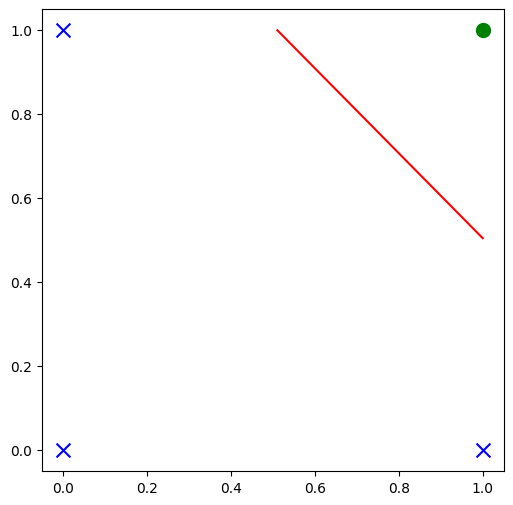

In [ ]:
##print("len(model.layers):", len(model.layers)) # 1
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = y_true.flatten()
##plt.scatter(X[:, 0], X[:,1], c=label, s = 100)
plt.scatter(X[label==0, 0], X[label==0, 1], marker='x', c="blue", s= 100)
plt.scatter(X[label==1, 0], X[label==1, 1], marker='o', c="green",s= 100)
##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx', markersize= 10)

def clippingLineBox(line, box):
    w0, w1, b = line
    xmin, xmax, ymin, ymax = box

    y0 =-(w0*xmin + b)/w1
    y1 =-(w0*xmax + b)/w1

    x0 = -(w1*ymin + b)/w0
    x1 = -(w1*ymax + b)/w0

    xpoints = []
    ypoints = []
    if ymin <= y0 <= ymax:
        xpoints.append(xmin)
        ypoints.append(y0)
    if ymin <= y1 <= ymax:
        xpoints.append(xmax)
        ypoints.append(y1)

    if xmin <= x0 <= xmax:
        xpoints.append(x0)
        ypoints.append(ymin)
    if xmin <= x1 <= xmax:
        xpoints.append(x1)
        ypoints.append(ymax)
    return xpoints, ypoints

# clip the line against a box, and draw
xpoints, ypoints = clippingLineBox(line=(w0, w1, b), box=(0, 1, 0, 1))
plt.plot(xpoints, ypoints, color='red')
plt.show()


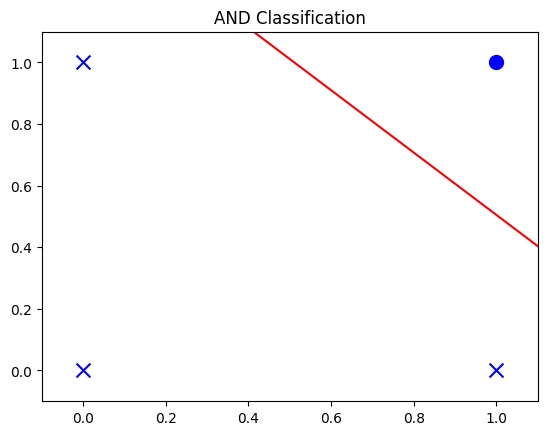

In [ ]:
first = lambda x: x[0]
second = lambda x: x[1]

def plot_gate(points, y_fn, title):
  fig, ax = plt.subplots()
  for point, marker in points:
    ax.scatter(first(point), second(point), marker=marker, c='blue', s=100)

  x = np.linspace(-.0, 2., 100)
  y = y_fn(x)
  ax.plot(x, y, c='red')

  ax.set_xlim(-.1, 1.1)
  ax.set_ylim(-.1, 1.1)
  ax.set_title(title)
  plt.show()

# w0 * x + w1 * y + b = 0
# y = -w0/w1x - b/w1
y = lambda x: -x*(w0/w1) + (-b/w1)
points = [((1, 1), 'o'), ((0, 0), 'x'), ((0, 1), 'x'), ((1, 0), 'x')]
plot_gate(points, y, 'AND Classification')

## p.142

### 1~3 line - import

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 5~12 line - dataset

In [ ]:
#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

#y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)    # AND
y_true = np.array([[0],[1], [1] ,[1]], dtype = np.float32)  # OR

### line 14~22 - model

In [ ]:
#2
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=2, activation='sigmoid'))
model.summary()

##model = tf.keras.Sequential()
##model.add(tf.keras.layers.Input(shape = (2,))) # shape = 2
##model.add(tf.keras.layers.Dense(units=1))
##model.add(tf.keras.layers.Activation('sigmoid'))
##model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### 24~27 line - configure

In [ ]:
#3
##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

### 29 line - train

In [ ]:
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0)

### 37~40 line - evaluate

In [ ]:
#4
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
print("test_loss:", test_loss)
print("test_acc:", test_acc)

1/1 - 0s - loss: 0.0174 - accuracy: 1.0000 - 197ms/epoch - 197ms/step
test_loss: 0.017409946769475937
test_acc: 1.0


In [ ]:
X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

### 42~43 line - predict

In [ ]:
y_pred = model.predict(X)
print("y_pred:", y_pred)
y_label = (y_pred> 0.5).astype(int)
print("y_label:", y_label)

1/1 [==============================] - 0s 45ms/step
y_pred: [[0.03497514]
 [0.99041396]
 [0.9758978 ]
 [0.99999136]]
y_label: [[0]
 [1]
 [1]
 [1]]


### 48~74 line - plot

In [ ]:
#5: calculate the decision boundary line, w0*x + w1*y + b = 0
##print(model.get_weights())
w0, w1 = model.layers[0].weights[0].numpy().flatten()
b = model.layers[0].bias.numpy()[0]
print("{:>.2f}*x {:+.2f}*y {:+.2f} = 0".format(w0, w1, b))

7.02*x +7.96*y -3.32 = 0


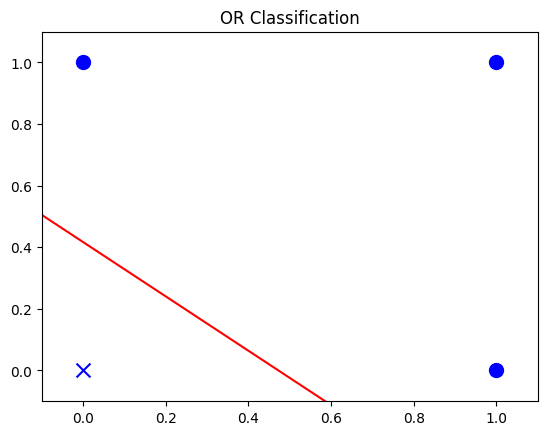

In [ ]:
first = lambda x: x[0]
second = lambda x: x[1]

def plot_gate(points, y_fn, title):
  fig, ax = plt.subplots()
  for point, marker in points:
    ax.scatter(first(point), second(point), marker=marker, c='blue', s=100)

  x = np.linspace(-.5, 2., 100)
  y = y_fn(x)
  ax.plot(x, y, c='red')

  ax.set_xlim(-.1, 1.1)
  ax.set_ylim(-.1, 1.1)
  ax.set_title(title)
  plt.show()

# w0 * x + w1 * y + b = 0
# y = -w0/w1x - b/w1
y = lambda x: -x*(w0/w1) + (-b/w1)
points = [((1, 1), 'o'), ((0, 0), 'x'), ((0, 1), 'o'), ((1, 0), 'o')]
plot_gate(points, y, 'OR Classification')

Text(0.5, 1.0, 'OR Classification')

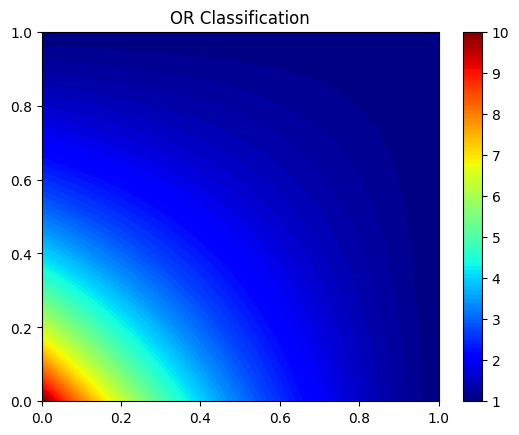

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
X,Y = np.meshgrid(x, y)
Z = 10**((X-1)*(Y-1))
con = ax.contourf(X, Y, Z, 100, cmap='jet')
fig.colorbar(con)
ax.set_title('OR Classification')

4/4 [==============================] - 0s 2ms/step


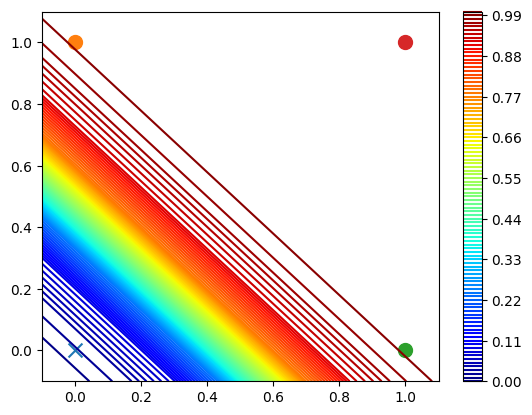

In [ ]:
fig, ax = plt.subplots()
plt.scatter(0,0, marker='x', s = 100)
plt.scatter(0, 1, marker='o', s = 100)
plt.scatter(1, 0, marker='o', s = 100)
plt.scatter(1, 1, marker='o', s = 100)
x = np.linspace(-.1, 1.1, 10)
y = np.linspace(-.1, 1.1, 10)
xx, yy = np.meshgrid(x, y)
sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
#Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
con = plt.contour(xx, yy, Z, levels=100, cmap='jet')
fig.colorbar(con)
plt.show()

(array([[ 4.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  3.],
        [ 3.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  4.],
        [ 2.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  5.],
        [ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  6.],
        [ 0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  7.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  8.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  9.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]]),
 array([0.00254835, 0.10229351, 0.20203866, 0.3017838 , 0.40152895,
        0.50127411, 0.60101926, 0.70076442, 0.80050957, 0.90025473,
        0.99999988]),
 <a list of 10 BarContainer objects>)

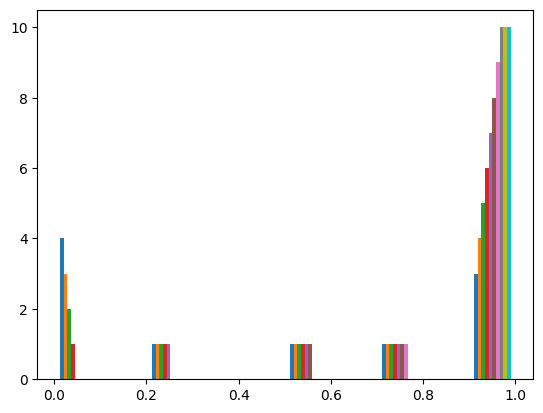

In [ ]:
plt.hist(Z)

# Step 19. 1-Dense Layer(2 units) - AND/OR classification

## p.145

### 1~3 line - import

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 5~12 line - dataset

In [ ]:
#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)   # AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32)  # OR
y_true  # sparse_categorical_crossentropy

array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

### 14~17 line - model

In [ ]:
#2
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_dim=2, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


### 19~22 line - configure

In [ ]:
##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 24~30 line - train

In [ ]:
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0)
##print("len(model.layers):", len(model.layers)) # 1
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

### 32~39 line - evaluate

In [ ]:
#3
##print(model.get_weights())
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].bias.numpy())
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
test_loss

weights: [[-5.4272213  3.3922222]
 [-4.607635   4.219801 ]]
bias: [ 6.634573 -6.634573]
1/1 - 0s - loss: 0.0089 - accuracy: 1.0000 - 121ms/epoch - 121ms/step


0.008949649520218372

### 38~42 line - predict

In [ ]:
y_pred = model.predict(X)
print("y_pred:", y_pred)

y_label = np.argmax(y_pred, axis = 1)
print("y_label:", y_label)

1/1 [==============================] - 0s 47ms/step
y_pred: [[9.99998331e-01 1.72696048e-06]
 [9.88361299e-01 1.16387298e-02]
 [9.88452852e-01 1.15471501e-02]
 [1.23981275e-02 9.87601817e-01]]
y_label: [0 0 0 1]


### 44~69 line - plot

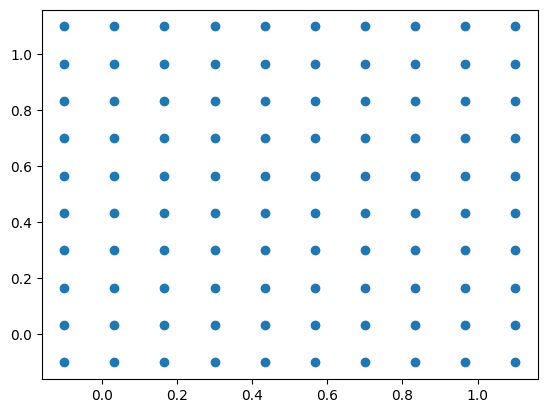

In [ ]:
plt.scatter(xx, yy)
plt.show()

4/4 [==============================] - 0s 3ms/step


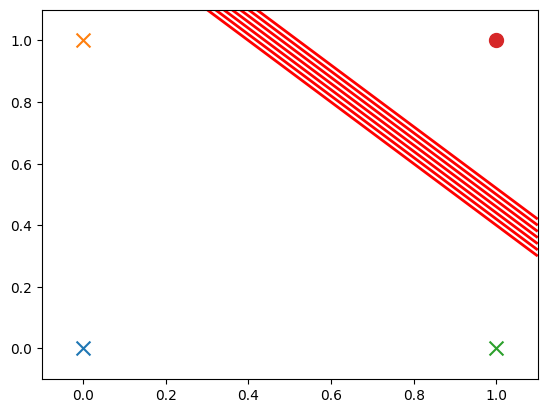

In [ ]:
fig, ax = plt.subplots()
plt.scatter(0, 0, marker='x', s = 100)
plt.scatter(0, 1, marker='x', s = 100)
plt.scatter(1, 0, marker='x', s = 100)
plt.scatter(1, 1, marker='o', s = 100)
x = np.linspace(-.1, 1.1, 10)
y = np.linspace(-.1, 1.1, 10)
xx, yy = np.meshgrid(x, y)
sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()

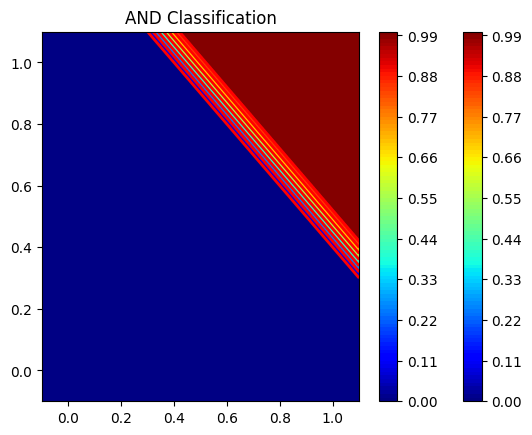

In [ ]:
con = ax.contourf(xx, yy, Z, 100, cmap='jet')
#fig.colorbar(con)
ax.set_title('AND Classification')
display(fig)

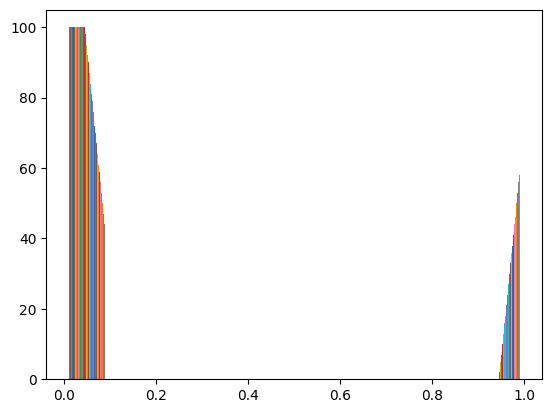

In [ ]:
plt.hist(Z)
plt.show()

## p.148

### 1~3 line - import

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 5~14 line - dataset

In [ ]:
#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

#y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)   # AND
y_true = np.array([[0],[1],[1],[2]], dtype = np.float32)  # OR
print("y_true=", y_true) # loss : sparse_categorical_crossentropy

y_true= [[0.]
 [1.]
 [1.]
 [2.]]


In [ ]:
y_true = tf.keras.utils.to_categorical(y_true)
print("y_true=", y_true) # loss : categorical_crossentropy

y_true= [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
[[1. 0., 0.]  # 0
 [0. 1., 0.]  # 1
 [0. 1., 0.]  # 1
 [0. 0., 1.]] # 2

### 16~19 line - model

In [ ]:
#2
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_dim=2, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


### 21~23 line - configure

In [ ]:
##opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### 25 line - train

In [ ]:
ret = model.fit(X, y_true, epochs=100, batch_size=4, verbose=0)

### 33~38 - evaluate

In [ ]:
#3
##print(model.get_weights())
print("weights:", model.layers[0].weights[0].numpy())
print("bias:", model.layers[0].bias.numpy())

test_loss, test_acc = model.evaluate(X, y_true, verbose=2)

weights: [[-6.2917624  5.9298844]
 [-6.2794123  5.0629616]]
bias: [ 2.7237267 -2.723752 ]
1/1 - 0s - loss: 0.0020 - accuracy: 1.0000 - 127ms/epoch - 127ms/step


### 39~43 line - predict

In [ ]:
y_pred = model.predict(X)
print("y_pred:", y_pred)

y_label = np.argmax(y_pred, axis = 1)
print("y_label:", y_label)

1/1 [==============================] - 0s 50ms/step
y_pred: [[9.9571133e-01 4.2886785e-03]
 [2.7459045e-03 9.9725407e-01]
 [1.1416163e-03 9.9885833e-01]
 [1.3554560e-08 1.0000000e+00]]
y_label: [0 1 1 1]


### 45~70 line - plot

313/313 [==============================] - 0s 1ms/step


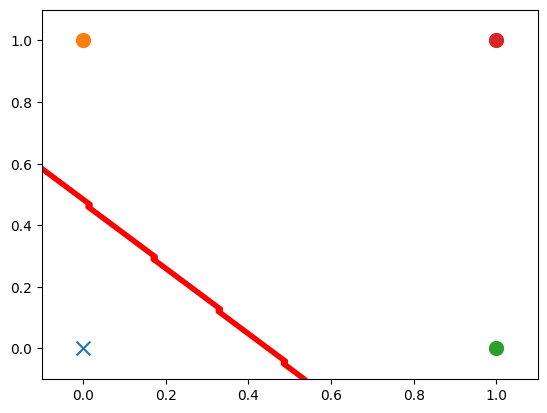

In [ ]:
fig, ax = plt.subplots()
plt.scatter(0, 0, marker='x', s = 100)
plt.scatter(0, 1, marker='o', s = 100)
plt.scatter(1, 0, marker='o', s = 100)
plt.scatter(1, 1, marker='o', s = 100)
x = np.linspace(-.1, 1.1, 100)
y = np.linspace(-.1, 1.1, 100)
xx, yy = np.meshgrid(x, y)
sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()

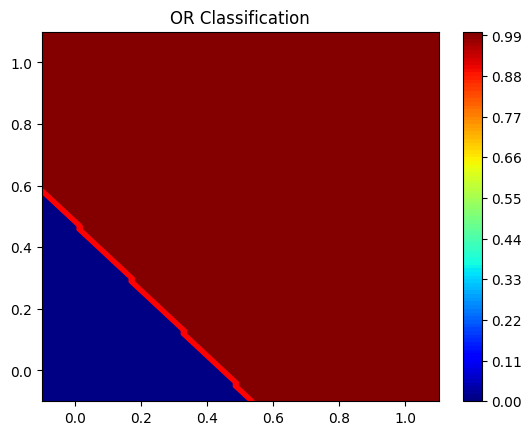

In [ ]:
con = ax.contourf(xx, yy, Z, 100, cmap='jet')
fig.colorbar(con)
ax.set_title('OR Classification')
display(fig)

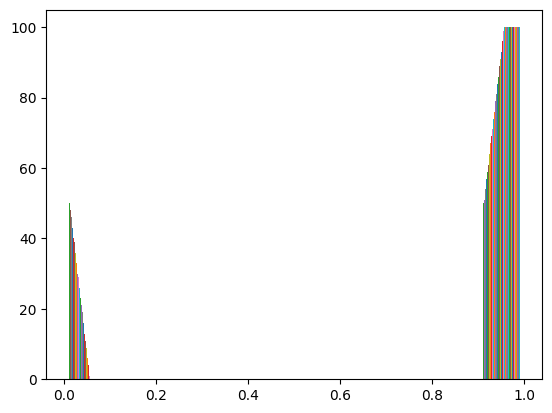

In [ ]:
plt.hist(Z)
plt.show()

313/313 [==============================] - 0s 1ms/step
(100, 100) (100, 100) (10000, 2) (10000, 2) (10000,)


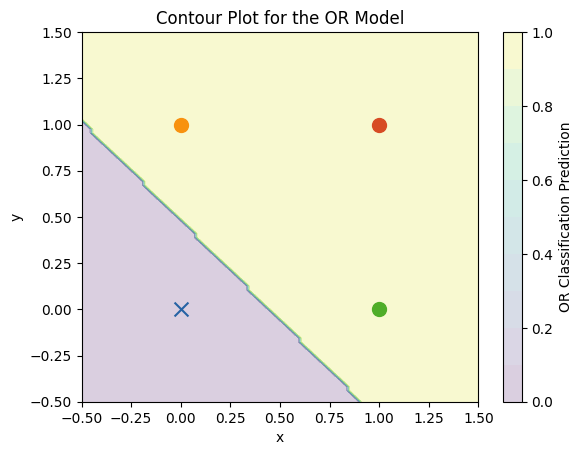

In [ ]:
first = lambda x: x[0]
second = lambda x: x[1]

def plot_gate_as_contour(model, points, gate='OR'):
    fig, ax = plt.subplots()
    for p, m in points:
      ax.scatter(first(p), second(p), marker=m, s = 100)

    a_range = np.linspace(-.5, 1.5, 100)
    b_range = np.linspace(-.5, 1.5, 100)
    a_grid, b_grid = np.meshgrid(a_range, b_range)

    input_data = np.stack([a_grid.flatten(), b_grid.flatten()], axis=-1)
    results = model.predict(input_data)
    results_1d = np.argmax(results, axis = 1) if 1 < results.shape[1] else np.round(results)
    print(a_grid.shape, b_grid.shape, input_data.shape, results.shape, results_1d.shape)
    grid = results_1d.reshape(a_grid.shape)

    plt.contourf(a_grid, b_grid, grid, levels=10, alpha=.2)
    plt.colorbar(label='{:} Classification Prediction'.format(gate))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Contour Plot for the {:} Model'.format(gate))

    plt.show()

or_points = [((0, 0), 'x'), ((0, 1), 'o'), ((1, 0), 'o'), ((1, 1), 'o')]
plot_gate_as_contour(model, or_points)

# Step 20. 2-Dense Layer - XOR classification


<img src="https://miro.medium.com/v2/resize:fit:1100/0*8MW8iP2QC_WNhmiW"/>


<img src="https://media.licdn.com/dms/image/C5612AQG2eQ_2VBxVDw/article-cover_image-shrink_600_2000/0/1520136487147?e=2147483647&v=beta&t=_SNKI5o_P4-EdvvwkJZf2d0k9Dvltbw2_jtTE5lMoaI"/>


As shown in the figure, there is no way to separate the 1 and 0 predictions with a single classification line.

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--kf3HzMfo--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://cdn-images-1.medium.com/max/2000/0%2AqdRb80zUpJPtrbRD." width="400"/>

## p.152

### 1~3 line - import

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 5~13 line - dataset

In [ ]:
#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

##y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)# AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32) # OR
y_true = np.array([[0],[1],[1],[0]], dtype = np.float32)   # XOR

In [ ]:
y_true

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

### 15~20 line - model

In [ ]:
#2
n = 2  # 10,  number of neurons in a hidden layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


### 29~31 line - configure

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt,loss='mse', metrics=['accuracy'])
##model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

### 33 line - train

In [ ]:
ret = model.fit(X, y_true, epochs=2000, batch_size=4, verbose=0)

### 50 line - evaluate

In [ ]:
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)
##y_pred = model.predict(X)
##print("y_pred:", y_pred)
##
##y_label = (y_pred> 0.5).astype(int)
##print("y_label:", y_label)

1/1 - 0s - loss: 4.0932e-06 - accuracy: 1.0000 - 114ms/epoch - 114ms/step


### 57~79 line - plot

6/6 [==============================] - 0s 2ms/step


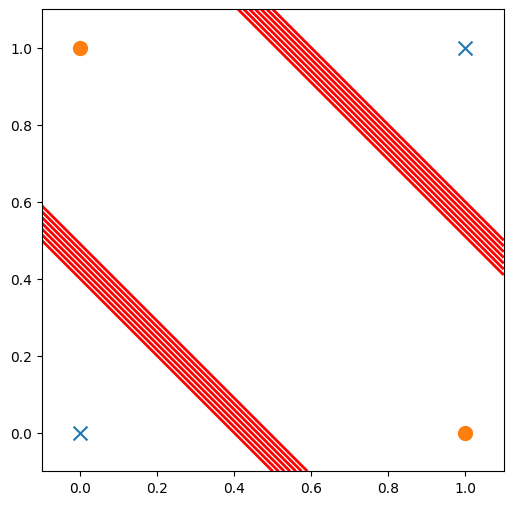

In [ ]:
#4: calculate the decision boundary
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

label = y_true.flatten()
plt.scatter(X[label==0, 0], X[label==0,1], marker='x', s = 100)
plt.scatter(X[label==1, 0], X[label==1,1], marker='o', s = 100)
##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx')

h = 0.1
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = (Z> 0.5).astype(int) # Z = np.round(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()

313/313 [==============================] - 0s 1ms/step
(100, 100) (100, 100) (10000, 2) (10000, 1) (10000, 1)


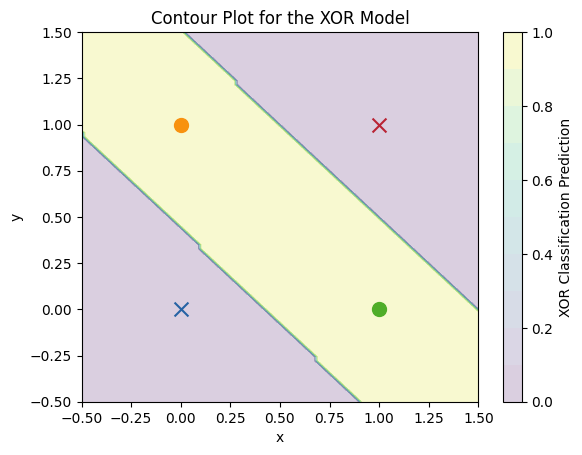

In [ ]:
xor_points = [((0, 0), 'x'), ((0, 1), 'o'), ((1, 0), 'o'), ((1, 1), 'x')]
plot_gate_as_contour(model, xor_points, 'XOR')

## p.155

### 1~3 line - import

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 5~16 line - dataset

In [ ]:
#1
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype = np.float32)

# loss='sparse_categorical_crossentropy'
##y_true = np.array([[0],[0], [0],[1]], dtype = np.float32)# AND
##y_true = np.array([[0],[1],[1],[1]], dtype = np.float32) # OR
y_true = np.array([[0],[1],[1],[0]], dtype = np.float32)   # XOR
y_true = tf.keras.utils.to_categorical(y_true) # loss='categorical_crossentropy'
print("y_true=", y_true) # categorical_crossentropy

y_true= [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


### 18~23 line - model

In [ ]:
#2
model = tf.keras.Sequential()
n = 2  # number of neurons in a hidden layer
model.add(tf.keras.layers.Dense(units=2, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


### 25~29 line - configure

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
##model.compile(optimizer=opt,
##              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 31 line - train

In [ ]:
ret = model.fit(X, y_true, epochs=1000, batch_size=4, verbose=0)

### 48 line - evaluate

In [ ]:
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)

1/1 - 0s - loss: 1.6898e-05 - accuracy: 1.0000 - 143ms/epoch - 143ms/step


### 57~79 line - plot

6/6 [==============================] - 0s 2ms/step


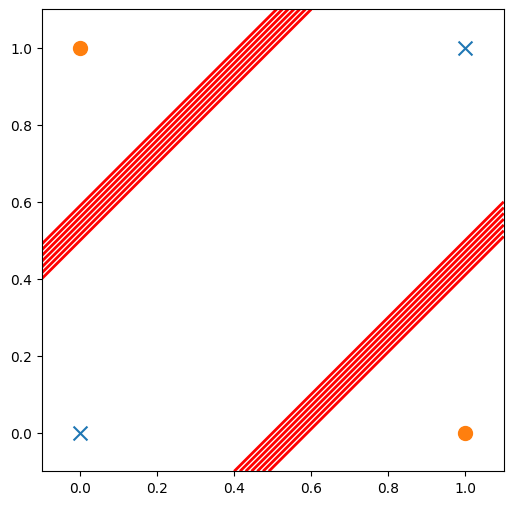

In [ ]:
#4: calculate the decision boundary
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

##label = y_true.flatten()            # loss='sparse_categorical_crossentropy'
label = np.argmax(y_true, axis = 1) # loss='categorical_crossentropy'
plt.scatter(X[label==0, 0], X[label==0,1], marker='x', s = 100)
plt.scatter(X[label==1, 0], X[label==1,1], marker='o', s = 100)
##for x,target in zip(X, y_true):
##        plt.plot(x[0],x[1],'go' if (target == 1.0) else 'bx')

h = 0.1
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=2)
plt.show()


313/313 [==============================] - 0s 1ms/step
(100, 100) (100, 100) (10000, 2) (10000, 2) (10000,)


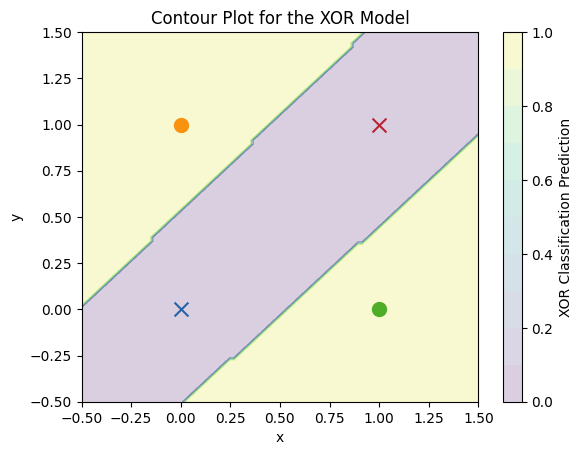

In [ ]:
xor_points = [((0, 0), 'x'), ((0, 1), 'o'), ((1, 0), 'o'), ((1, 1), 'x')]
plot_gate_as_contour(model, xor_points, 'XOR')

# Step 21. 2D-Normal Distribution Data Generation & Classification

## p.160

### 1~3 line - import

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Note - multivariate_normal


> **random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)**

https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

* Draw random samples from a multivariate normal distribution.

* The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions.

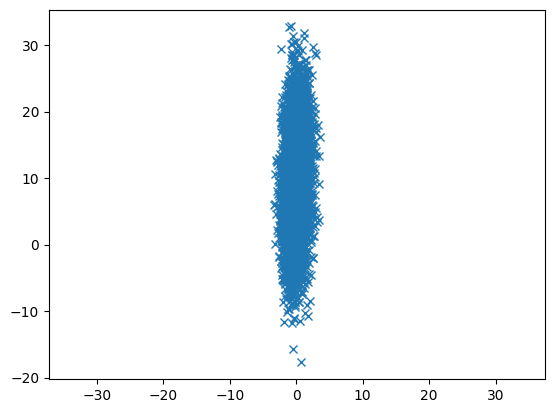

In [ ]:
mean = [0, 10]      # 키, 몸무게
cov = [[1, 1],
       [1, 50]]  # covariance matrix
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

## Covariance

> <a href="https://en.wikipedia.org/wiki/Covariance">Covariance</a>

> In probability theory and statistics, covariance is a measure of the joint variability of two random variables.

**numpy.cov(m, y=None, rowvar=True, bias=False, ddof=None, fweights=None, aweights=None, *, dtype=None)**

* Estimate a covariance matrix, given data and weights.

https://numpy.org/doc/stable/reference/generated/numpy.cov.html

<img src="https://cdn1.byjus.com/wp-content/uploads/2021/03/covariance-2.png" width="800"/>

$$cov_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$$

In [ ]:
x = np.array([[0, 2], [1, 1], [2, 0]]).T
print(x)
print(np.mean(x, axis=1))
mean = np.mean(x, axis=1)
x_mean = first(mean)
y_mean = second(mean)

xx = x[:1,] - x_mean
yy = x[1:] - y_mean
N = x.shape[1]-1
print(xx)
print(yy)
print(xx * yy)
print(sum((xx*yy).flatten()))
print(N)

cov = sum((xx*yy).flatten()) / N
print(cov)
np.cov(x) # Covariance Matrix

[[0 1 2]
 [2 1 0]]
[1. 1.]
[[-1.  0.  1.]]
[[ 1.  0. -1.]]
[[-1.  0. -1.]]
-2.0
2
-1.0


array([[ 1., -1.],
       [-1.,  1.]])

### 5~26 - dataset

In [ ]:
#1
def createData(N=50):
    np.random.seed(1)
    X0 = np.random.multivariate_normal(mean=[0.0, 0.0], cov= [[0.02, 0],
                                                              [0, 0.01]], size=N)
    y_true0 = np.zeros(shape = (N,))

    X1 = np.random.multivariate_normal(mean=[0.0, 0.8], cov= [[0.01, 0],
                                                              [0, 0.01]], size=N)
    y_true1 = np.ones(shape = (N,))

    X2 = np.random.multivariate_normal(mean=[0.3, 0.3], cov= [[0.01, 0],
                                                              [0, 0.01]], size=N)
    y_true2 = np.ones(shape = (N,))*2

    X3 = np.random.multivariate_normal(mean=[0.8, 0.3], cov= [[0.01, 0],
                                                              [0, 0.02]], size=N)
    y_true3 = np.ones(shape = (N,))*3

    X = np.vstack((X0, X1, X2, X3))
    y_true = np.hstack((y_true0, y_true1, y_true2, y_true3))
    return X, y_true

X, y_true = createData()
y_true = tf.keras.utils.to_categorical(y_true) # 'mse', 'categorical_crossentropy'
print("y_true=", y_true.shape)

y_true= (200, 4)


In [ ]:
X

In [ ]:
X.shape

(200, 2)

In [ ]:
y_true[0]

array([1., 0., 0., 0.], dtype=float32)

### 28~40 line - model

In [ ]:
#2
n = 10  # number of neurons in a hidden layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_dim=2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))
model.summary()

##model = tf.keras.Sequential()
##model.add(tf.keras.layers.Input(shape = (2,))) # shape = 2
##model.add(tf.keras.layers.Dense(units=n))
##model.add(tf.keras.layers.Activation('sigmoid'))
##model.add(tf.keras.layers.Dense(units=4))
##model.add(tf.keras.layers.Activation('softmax'))
##model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 dense_13 (Dense)            (None, 4)                 12        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


### 42~46 line - configure


In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
##model.compile(optimizer=opt,loss='mse', metrics=['accuracy'])
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
##model.compile(optimizer=opt,
##              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 48 line - train

In [ ]:
ret = model.fit(X, y_true, epochs=100, verbose=0) # batch_size=32

### 65 line - evaluate

In [ ]:
test_loss, test_acc = model.evaluate(X, y_true, verbose=2)

7/7 - 0s - loss: 0.0626 - accuracy: 0.9850 - 213ms/epoch - 30ms/step


### 67~70 line - predict

In [ ]:
y_pred = model.predict(X)
##print("y_pred:", y_pred)
y_label = np.argmax(y_pred, axis = 1)
print("y_label:", y_label)

7/7 [==============================] - 0s 2ms/step
y_label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


### 72~98 line - plot

confusion_matrix(C): tf.Tensor(
[[50  0  0  0]
 [ 0 50  0  0]
 [ 1  1 48  0]
 [ 0  0  1 49]], shape=(4, 4), dtype=int32)
493/493 [==============================] - 1s 1ms/step


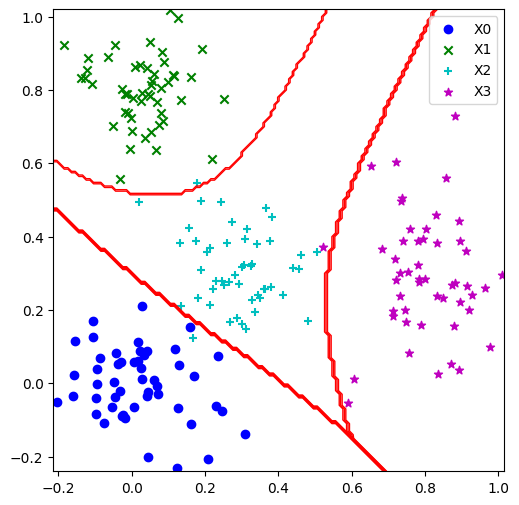

In [ ]:
C = tf.math.confusion_matrix(np.argmax(y_true, axis = 1), y_label)
print("confusion_matrix(C):", C)

#4: calculate the decision boundary
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.gca().set_aspect('equal')

markers = "ox+*"
colors  = "bgcm"
labels  = ("X0", "X1", "X2", "X3")
##label = y_true.flatten()          # loss='sparse_categorical_crossentropy'
label = np.argmax(y_true, axis = 1) # loss='mse', 'categorical_crossentropy'
for i, k in enumerate(np.unique(label)):
    plt.scatter(X[label==k, 0], X[label==k, 1],
                c = colors[i], marker=markers[i], label = labels[i])
plt.legend()

h = 0.01
x_min, x_max = X[:, 0].min()-h, X[:, 0].max()+h
y_min, y_max = X[:, 1].min()-h, X[:, 1].max()+h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

sample = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(sample)
Z = np.argmax(Z, axis = 1)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red', linewidths=1)
plt.show()

In [ ]:
X0, X1, X2, X3 = np.split(X, 4, axis=0)
print(X0.shape, X1.shape, X2.shape, X3.shape)
params = zip("ox+*", "bgcm", ["X0", "X1", "X2", "X3"])
keys = ['marker', 'color', 'label']
dict_params = [dict(zip(keys, p)) for p in params]

(50, 2) (50, 2) (50, 2) (50, 2)


In [ ]:
dict_params

[{'marker': 'o', 'color': 'b', 'label': 'X0'},
 {'marker': 'x', 'color': 'g', 'label': 'X1'},
 {'marker': '+', 'color': 'c', 'label': 'X2'},
 {'marker': '*', 'color': 'm', 'label': 'X3'}]

313/313 [==============================] - 1s 3ms/step
(100, 100) (100, 100) (10000, 2) (10000, 4) (10000,)


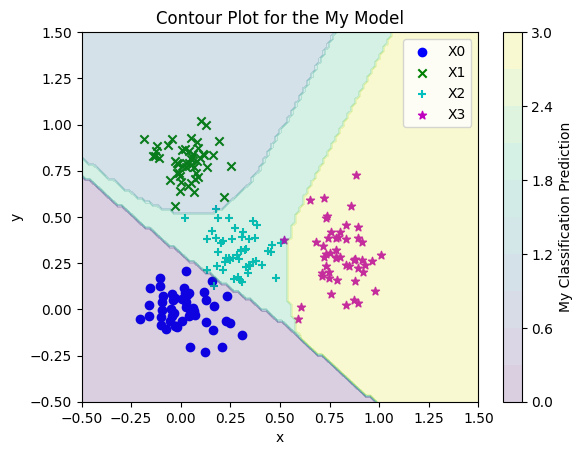

In [ ]:
def plot_points(fig, ax, points, **kargs):
  x, y = np.split(points, 2, axis=1)
  ax.scatter(x, y, **kargs)
  ax.legend()

def plot_result_as_contour(model, model_name='My'):
    x_range = np.linspace(-.5, 1.5, 100)
    y_range = np.linspace(-.5, 1.5, 100)
    x_grid, y_grid = np.meshgrid(x_range, y_range)

    input_data = np.stack([x_grid.flatten(), y_grid.flatten()], axis=-1)
    z = model.predict(input_data)
    z_1d = np.argmax(z, axis = 1) if 1 < z.shape[1] else np.round(z)
    print(x_grid.shape, y_grid.shape, input_data.shape, z.shape, z_1d.shape)
    z_grid = z_1d.reshape(x_grid.shape)

    plt.contourf(x_grid, y_grid, z_grid, levels=10, alpha=.2)
    plt.colorbar(label='{:} Classification Prediction'.format(model_name))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title('Contour Plot for the {:} Model'.format(model_name))

    plt.show()

fig, ax = plt.subplots()
for x, p in zip([X0, X1, X2, X3], dict_params):
  plot_points(fig, ax, x, **p)

plot_result_as_contour(model)

# Step 22. IRIS Data Classification

## p.164

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving iris.csv to iris.csv
User uploaded file "iris.csv" with length 3858 bytes


<img src="https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png"/>

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor)

* petal(꽃잎)
* sepal(꽃받침)

three species of Iris

* Iris setosa,
* Iris virginica and
* Iris versicolor

In [ ]:
def load_Iris(shuffle=True):
    label={'setosa':0, 'versicolor':1, 'virginica':2}
    fileName = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
    df = pd.read_csv(fileName, header=0, converters={4: lambda name: label[name]})
    return df
    #data = df.values
    #if shuffle:
    #    np.random.shuffle(data)
    #return data

##iris_data = load_Iris(shuffle=True)
iris_data = load_Iris()
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


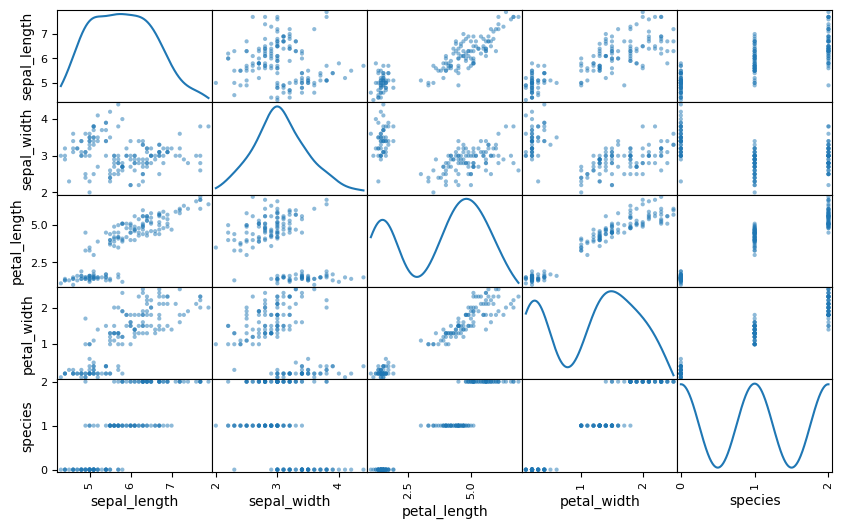

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_data, alpha=0.5, figsize=(10, 6), diagonal='kde');

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris_data.groupby(['species']).count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


X.shape: (150, 4)
y_true.shape: (150,)
[[6.5 2.8 4.6 1.5]
 [6.5 3.  5.5 1.8]
 [7.7 3.8 6.7 2.2]]
[1. 2. 2.]


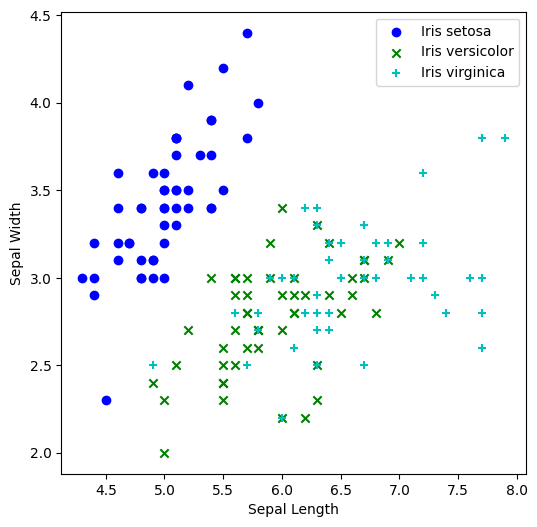

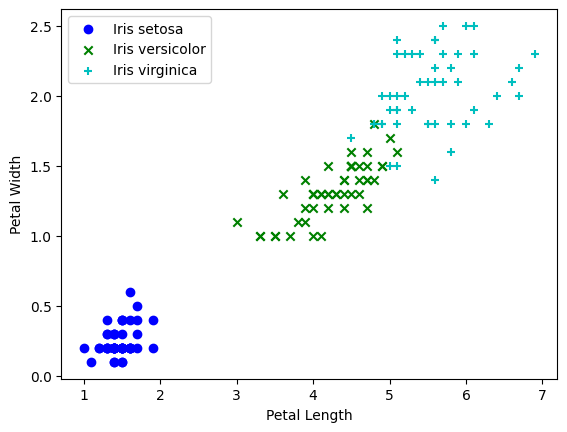

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
'''
ref1: https://en.wikipedia.org/wiki/Iris_flower_data_set#Data_set
ref2: https://gist.github.com/curran/a08a1080b88344b0c8a7#file-iris-csv
'''

#1
def load_Iris(shuffle=True):
    label={'setosa':0, 'versicolor':1, 'virginica':2}
    fileName = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
    df = pd.read_csv(fileName, header=0, converters={4: lambda name: label[name]})
    data = df.values
    if shuffle:
        np.random.shuffle(data)
    return data

##iris_data = load_Iris(shuffle=True)
iris_data = load_Iris()
X      = iris_data[:,:-1]
y_true = iris_data[:, -1]

print("X.shape:", X.shape)
print("y_true.shape:", y_true.shape)
print(X[:3])
print(y_true[:3])

#2
markers= "ox+*sd"
colors = "bgcmyk"
labels = ["Iris setosa","Iris versicolor", "Iris virginica"]

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
for i, k in enumerate(np.unique(y_true)):
  plt.scatter(X[y_true== k, 0], # Sepal Length
              X[y_true== k, 1], # Sepal Width
              c=colors[i], marker=markers[i], label=labels[i])
plt.legend(loc='best')
plt.show()

#3
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
for i, k in enumerate(np.unique(y_true)):
  plt.scatter(X[y_true== k, 2], # Petal Length
              X[y_true== k, 3], # Petal Width
              c=colors[i], marker=markers[i], label=labels[i])
plt.legend(loc='best')
plt.show()

x_train.shape: (120, 4)
y_train.shape: (120,)
x_test.shape: (30, 4)
y_test.shape: (30,)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
 dense_9 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
len(model.layers): 2


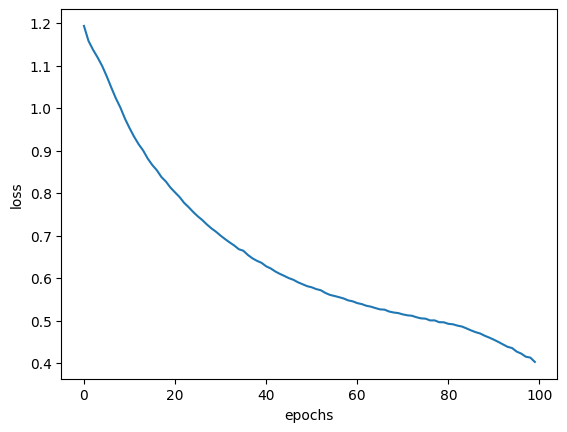

4/4 - 0s - loss: 0.3975 - accuracy: 0.9750 - 441ms/epoch - 110ms/step
1/1 - 0s - loss: 0.4141 - accuracy: 0.9667 - 25ms/epoch - 25ms/step
4/4 [==============================] - 0s 3ms/step
confusion_matrix(C): tf.Tensor(
[[41  0  0]
 [ 0 39  3]
 [ 0  0 37]], shape=(3, 3), dtype=int32)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#1
def load_Iris(shuffle=True):
    label={'setosa':0, 'versicolor':1, 'virginica':2}
    fileName = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
    df = pd.read_csv(fileName, header=0, converters={4: lambda name: label[name]})
    data = df.values
    if shuffle:
        np.random.shuffle(data)
    return data

def train_test_data_set(iris_data, test_rate=0.2): # train: 0.8, test: 0.2
    n = int(iris_data.shape[0]*(1-test_rate))
    x_train = iris_data[:n,:-1]
    y_train = iris_data[:n, -1]

    x_test = iris_data[n:,:-1]
    y_test = iris_data[n:,-1]
    return (x_train, y_train), (x_test, y_test)

iris_data = load_Iris(shuffle=True)
(x_train, y_train), (x_test, y_test) = train_test_data_set(iris_data, test_rate=0.2)
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:",  x_test.shape)
print("y_test.shape:",  y_test.shape)

# one-hot encoding: 'mse', 'categorical_crossentropy'
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#2
n = 10  # number of neurons in a hidden layer
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_dim=4, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
model.summary()

#3
def MSE(y, t):
    return tf.reduce_mean(tf.square(y - t)) # (y - t)**2

CCE = tf.keras.losses.CategoricalCrossentropy()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
##model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
##model.compile(optimizer=opt, loss= MSE, metrics=['accuracy'])
##model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=opt, loss= CCE, metrics=['accuracy'])

ret = model.fit(x_train, y_train, epochs=100, verbose=0) # batch_size=32
print("len(model.layers):", len(model.layers))  # 2
loss = ret.history['loss']
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

#4
##print(model.get_weights())
##for i in range(len(model.layers)):
##    print("layer :", i, '-'*20)
##    w = model.layers[i].weights[0].numpy()
##    b = model.layers[i].bias.numpy()
##    print("weights[{}]: {}".format(i, np.array2string(w)))
##    print("bias[{}]:    {}".format(i, np.array2string(b)))

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
print("confusion_matrix(C):", C)

https://pandas.pydata.org/docs/reference/api/pandas.plotting.radviz.html

Plot a multidimensional dataset in 2D.

<Axes: >

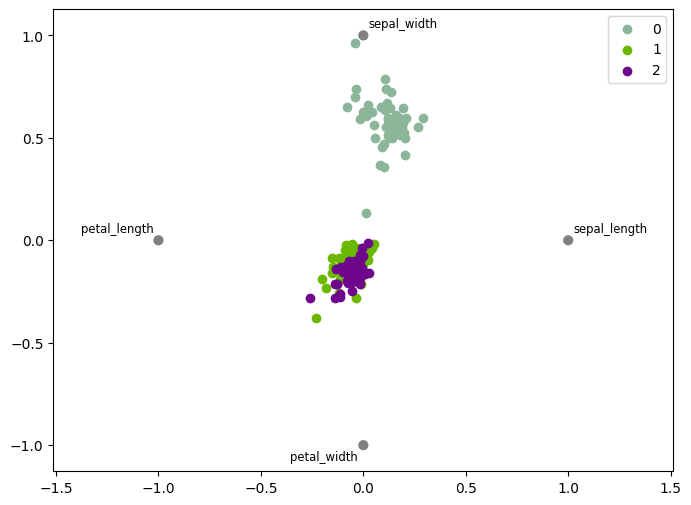

In [ ]:
import pandas as pd
from pandas.plotting import radviz, scatter_matrix

label={'setosa':0, 'versicolor':1, 'virginica':2}
fileName = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df = pd.read_csv(fileName, header=0, converters={4: lambda name: label[name]})

fig, ax = plt.subplots(figsize=(8,6))
radviz(df, "species", ax=ax)


Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
print(X.shape, y.shape)

(150, 4) (150,)


explained variance ratio (first two components): [0.92461872 0.05306648]


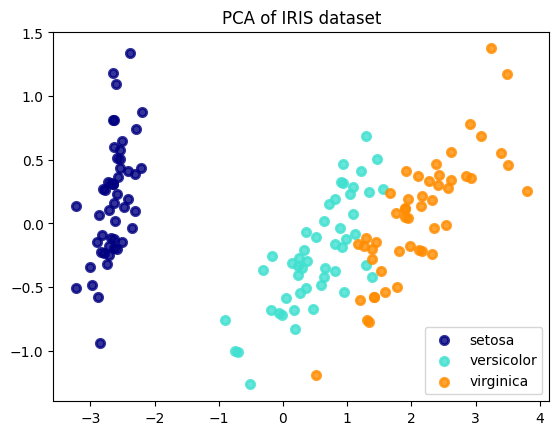

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA


iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")
plt.show()

# Lab

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, CategoricalCrossentropy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

class Benchmark:
    def __init__(self):
        self.model = None
        self.scaler = dict()

    def dataset(self, train_size=100):
        raise NotImplementedError

    def min_max_scaler(self, data):
        from collections import defaultdict
        new_data = list()
        for i, d in enumerate(data.T):
          scaler = MinMaxScaler()
          #d = scaler.fit_transform(np.reshape(d, (-1, 1)))
          new_data.append(scaler.fit_transform(np.reshape(d, (-1, 1))))
          key = '{:}{:}'.format(label, i)
          self.scaler[key] = scaler
        #print(self.scaler)
        #print(np.array(new_data).shape)
        return np.squeeze(np.array(new_data), axis=2).T.shape

    def standard_scaler(self, data, label='x'):
        from collections import defaultdict
        new_data = list()
        for i, d in enumerate(data.T):
          scaler = StandardScaler()
          #d = scaler.fit_transform(np.reshape(d, (-1, 1)))
          new_data.append(scaler.fit_transform(np.reshape(d, (-1, 1))))
          key = '{:}{:}'.format(label, i)
          self.scaler[key] = scaler
        #print(self.scaler)
        #print(np.array(new_data).shape)
        return np.squeeze(np.array(new_data), axis=2).T

    def inverse_transform(self, x, label='x'):
        print(self.scaler)
        new_data = list()
        for i, d in enumerate(x.T):
          key = '{:}{:}'.format(label, i)
          print('d:', d.shape, 'key:', key)
          if key in self.scaler:
            print('d.reshape:', np.reshape(d, (-1, 1)).shape)
            new_data.append(self.scaler[key].inverse_transform(np.reshape(d, (-1, 1))))
        print(np.array(new_data).shape)
        return np.squeeze(np.array(new_data), axis=2).T

    # def transform_data(self, x, y, scaler):
    #     X = self.scaler(x)
    #     Y = self.scaler(y.reshape(-1, 1))
    #     return X, Y

    def make_hyper_params(self):
        raise NotImplementedError

    def make_optimizer(self, name, lr):
        #print('make_optimizer', name)
        if name == 'Adam':
            return Adam(learning_rate=lr)
        elif name == 'RMSprop':
            return RMSprop(learning_rate=lr)
        elif name == 'SGD':
            return SGD(learning_rate=lr)
        else:
            raise ValueError('Unknown optimizer')

    def make_loss_func(self, name):
        if name == 'MAE':
            return MeanAbsoluteError()
        elif name == 'MSE':
            return MeanSquaredError()
        elif name == 'CCE':
            return CategoricalCrossentropy()
        else:
            raise ValueError('Unknown loss function')

    def make_model(self, opt='Adam', lr='0.01', loss_fn='MSE', **kargs):
        raise NotImplementedError

    def train(self, X, y, epochs=50, batch=1, callbacks=None, **kargs):
        if self.model is not None:
            self.model.fit(X, y, epochs=epochs, batch_size=batch, callbacks=callbacks)

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

    def predict(self, X):
        return self.model.predict(X)

    def get_result(self):
        raise NotImplementedError

    def plot_result(self, data, ylabel, xlabel='epochs'):
        plt.plot(data)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    def plot_predict(self, X_train, y_train):
        y_pred = self.predict(X_train)
        x_origin = self.inverse_transform(X_train, 'x')
        y_origin = self.inverse_transform(y_train, 'y')
        y_pred_origin = self.inverse_transform(y_pred, 'y')
        plt.scatter(x_origin, y_origin)
        plt.plot(x_origin, y_pred_origin, label='Predicted', color='red')
        plt.legend()
        plt.show()

    def save_model(self, filename):
        self.model.save(filename)

    def save_model_weights(self, checkpoint_path):
      return self.model.save_weights(checkpoint_path)

    def load_model(self, filename):
        return self.model.load_model(filename)

    def load_model_weights(self, checkpoint_path):
      return self.model.load_weights(checkpoint_path)

    def load_lastest_checkpoint(self, checkpoint_path):
      latest = tf.keras.models.lastest_checkpoint(checkpoint_path)
      return self.model.load_weights(latest)

    def make_checkpoint_callback(self, save_best_only=True, period=5):
        filepath = 'model_checkpoint.h5'
        checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, save_best_only=save_best_only, save_weights_only=False, monitor='val_loss',
                                    mode='min', verbose=1, save_freq='epoch', period=period)
        return checkpoint

    # def make_tensorboard_callback(self, log_dir='./logs'):
    #     tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True,
    #                               update_freq='epoch', profile_batch=2, embeddings_freq=1)
    #     return tensorboard

    # TODO: how can we selelct the best model from the benchmark
    def benchmark(self, X, y, params=None):
        import sys
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        hyper_params = self.make_hyper_params() if params is None else params
        min_loss = sys.float_info.max
        results = list()
        for i, param in enumerate(hyper_params):
          print('*'*20)
          print('#{}, opt: {}, lr: {}, loss_fn: {}, batch: {}'\
                .format(i, param['opt'], param['lr'], param['loss_fn'], param['batch']))
          self.make_model(**param)
          record = self.train(X_train, y_train, **param)
          result = self.get_result()
          print('result', result)
          if result['loss'][-1] < min_loss:
            print('loss: {:.2f}, weights: {}, bias: {}'.format(result['loss'][-1], result['weights'], result['bias']))
            score = self.evaluate(X_test, y_test)
            result['score'] = score
            results.append(result)
        return results


In [ ]:
class MyIrisBenchmark(Benchmark):
    def __init__(self, train_size=100):
        super().__init__()
        #self.X, self.y = self.dataset(train_size)

    def dataset(self, shuffle=True, train_size=100):
          self.labels={'setosa':0, 'versicolor':1, 'virginica':2}
          fileName = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
          df = pd.read_csv(fileName, header=0, converters={4: lambda name: self.labels[name]})
          data = df.values
          if shuffle:
              np.random.shuffle(data)
          return data[:,:-1], data[:, -1]

    def make_hyper_params(self):
          params = {
              'opt': ['Adam'],
              'lr': [0.1, 0.01],
              'loss_fn': ['CCE'],
              'metrics': ['accuracy'],
              'batch': [4, 8],
              'callbacks': [
                self.make_checkpoint_callback(save_best_only=False, period=5),
              ]
          }
          import itertools
          permutations_dicts = [dict(zip(params.keys(), v))  for v in itertools.product(*params.values())]
          permutations_dicts
          return permutations_dicts

    def make_model(self, opt='Adam', lr='0.01', loss_fn='MSE', **kargs):
        self.model = tf.keras.Sequential()
        self.model.add(tf.keras.layers.Dense(units=2, input_dim=4, activation='sigmoid'))
        self.model.add(tf.keras.layers.Dense(units=3, activation='softmax'))
        print(self.model.summary())
        optimizer = self.make_optimizer(opt, lr)
        loss_func = self.make_loss_func(loss_fn)
        self.model.compile(optimizer=optimizer, loss=loss_func, metrics=kargs['metrics'])
        #return self.model

    def get_result(self):
        return {
            'loss': self.model.history.history['loss'],
            'accuracy': self.model.history.history['accuracy'],
            'weights': self.model.layers[0].weights[:-1][0].numpy(),
            'bias': self.model.layers[0].weights[-1].numpy()
        }

    def plot_PCA(self, X, y):
        target_names = self.labels

        pca = PCA(n_components=2)
        X_r = pca.fit(X).transform(X)

        # Percentage of variance explained for each components
        print(
            "explained variance ratio (first two components): %s"
            % str(pca.explained_variance_ratio_)
        )

        fig, ax = plt.subplots()
        colors = ["navy", "turquoise", "darkorange"]

        for color, i, target_name in zip(colors, [0, 1, 2], target_names):
            ax.scatter(
                X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=2, label=target_name
            )
        ax.legend(loc="best", shadow=False, scatterpoints=1)
        ax.set_title("PCA of IRIS dataset")
        plt.show()

In [ ]:
my_benchmark = MyIrisBenchmark()

In [ ]:
X, y = my_benchmark.dataset()
X_transformed = my_benchmark.standard_scaler(X, 'x')
y_train = tf.keras.utils.to_categorical(y)
print(X_transformed.shape, y_train.shape)

(150, 4) (150, 3)


In [ ]:
result = my_benchmark.benchmark(X_transformed, y_train)

********************
#0, opt: Adam, lr: 0.1, loss_fn: CCE, batch: 4
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 2)                 10        
                                                                 
 dense_19 (Dense)            (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
30/30 [==============================] - 1s 1ms/step - loss: 0.9318 - accuracy: 0.5083
Epoch 2/50
30/30 [==============================] - 0s 1ms/step - loss: 0.5408 - accuracy: 0.7000
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.7667
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.3259 - accura

In [ ]:
result[-1]

{'loss': [1.1091029644012451,
  1.0812188386917114,
  1.0703774690628052,
  1.0557763576507568,
  1.0252248048782349,
  0.9733045101165771,
  0.9029108881950378,
  0.8307254910469055,
  0.7644774317741394,
  0.7126292586326599,
  0.6669595241546631,
  0.6328137516975403,
  0.6036053895950317,
  0.580031156539917,
  0.5615512132644653,
  0.5427039265632629,
  0.5276146531105042,
  0.5120909810066223,
  0.4986362159252167,
  0.48548030853271484,
  0.47283652424812317,
  0.459077388048172,
  0.44612857699394226,
  0.433403879404068,
  0.4207579493522644,
  0.40849873423576355,
  0.393913209438324,
  0.3810352087020874,
  0.36824312806129456,
  0.35678133368492126,
  0.344189316034317,
  0.3317965269088745,
  0.32169994711875916,
  0.3103087246417999,
  0.3002072870731354,
  0.2903386652469635,
  0.2807926833629608,
  0.2722983658313751,
  0.26388856768608093,
  0.2557646930217743,
  0.24818557500839233,
  0.2404240071773529,
  0.23437747359275818,
  0.23016102612018585,
  0.22036543488502

In [ ]:
my_benchmark.evaluate(X_transformed, y_train)

5/5 [==============================] - 0s 3ms/step - loss: 0.1814 - accuracy: 0.9667


[0.18136228621006012, 0.9666666388511658]

In [ ]:
y_pred = my_benchmark.predict(X_transformed)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
print("confusion_matrix(C):", C)

5/5 [==============================] - 0s 2ms/step
confusion_matrix(C): tf.Tensor(
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]], shape=(3, 3), dtype=int32)


explained variance ratio (first two components): [0.72962445 0.22850762]


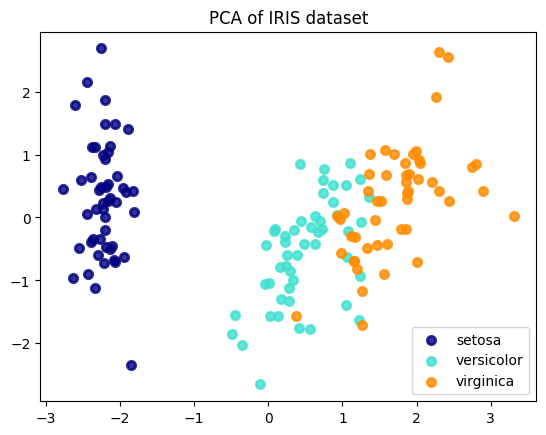

In [ ]:
my_benchmark.plot_PCA(X_transformed, y)